In [1]:
from pathlib import Path
import pandas as pd
import SimpleITK as sitk
import pydicom
import matplotlib.pyplot as plt

## Viewing Images

In [5]:
!tree /gpfs_projects/brandon.nelson/RSTs/pediatricIQphantoms -P *_000.dcm | head -n 15

/gpfs_projects/brandon.nelson/RSTs/pediatricIQphantoms
├── CTP404
│   ├── diameter_112mm
│   │   ├── dose_025
│   │   │   └── fbp
│   │   │       └── 112mm_CTP404_000.dcm
│   │   └── dose_100
│   │       └── fbp
│   │           └── 112mm_CTP404_000.dcm
│   ├── diameter_131mm
│   │   ├── dose_025
│   │   │   └── fbp
│   │   │       └── 131mm_CTP404_000.dcm
│   │   └── dose_100
│   │       └── fbp


In [36]:
from pathlib import Path
import pandas as pd
base_dir = Path('/gpfs_projects/brandon.nelson/RSTs/pediatricIQphantoms')
metadata = pd.read_csv(base_dir / 'metadata.csv')
metadata.file = metadata.file.apply(lambda o: base_dir / o)

In [37]:
metadata

,Name,effective diameter [cm],age [year],pediatric subgroup,phantom,scanner,Dose [%],recon,kernel,FOV [cm],file,patientid,studyid,series,repeat
0,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,0.0,0,simulation,0
1,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,0.0,0,simulation,1
2,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,0.0,0,simulation,2
3,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,0.0,0,simulation,3
4,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,0.0,0,simulation,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,35.0 cm uniform,35.0,39.000000,adult,uniform,Siemens Somatom Definition,100.0,fbp,D45,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,23.0,93,simulation,197
6756,35.0 cm uniform,35.0,39.000000,adult,uniform,Siemens Somatom Definition,100.0,fbp,D45,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,23.0,93,simulation,198
6757,35.0 cm uniform,35.0,39.000000,adult,uniform,Siemens Somatom Definition,100.0,fbp,D45,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,23.0,93,simulation,199
6758,35.0 cm uniform,35.0,39.000000,adult,uniform,Siemens Somatom Definition,NaN,ground truth,NaN,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,23.0,94,ground truth,0


In [68]:
metadata[metadata.phantom=='MITA-LCD']

,Name,effective diameter [cm],age [year],pediatric subgroup,phantom,scanner,Dose [%],recon,kernel,FOV [cm],file,patientid,studyid,series,repeat
328,11.2 cm MITA-LCD,11.2,0.083333,newborn,MITA-LCD,Siemens Somatom Definition,25.0,fbp,D45,12.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,8.0,32,simulation,0
329,11.2 cm MITA-LCD,11.2,0.083333,newborn,MITA-LCD,Siemens Somatom Definition,25.0,fbp,D45,12.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,8.0,32,simulation,1
330,11.2 cm MITA-LCD,11.2,0.083333,newborn,MITA-LCD,Siemens Somatom Definition,25.0,fbp,D45,12.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,8.0,32,simulation,2
331,11.2 cm MITA-LCD,11.2,0.083333,newborn,MITA-LCD,Siemens Somatom Definition,25.0,fbp,D45,12.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,8.0,32,simulation,3
332,11.2 cm MITA-LCD,11.2,0.083333,newborn,MITA-LCD,Siemens Somatom Definition,25.0,fbp,D45,12.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,8.0,32,simulation,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,35.0 cm MITA-LCD,35.0,39.000000,adult,MITA-LCD,Siemens Somatom Definition,100.0,fbp,D45,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,15.0,61,simulation,197
3540,35.0 cm MITA-LCD,35.0,39.000000,adult,MITA-LCD,Siemens Somatom Definition,100.0,fbp,D45,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,15.0,61,simulation,198
3541,35.0 cm MITA-LCD,35.0,39.000000,adult,MITA-LCD,Siemens Somatom Definition,100.0,fbp,D45,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,15.0,61,simulation,199
3542,35.0 cm MITA-LCD,35.0,39.000000,adult,MITA-LCD,Siemens Somatom Definition,NaN,ground truth,NaN,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,15.0,62,ground truth,0


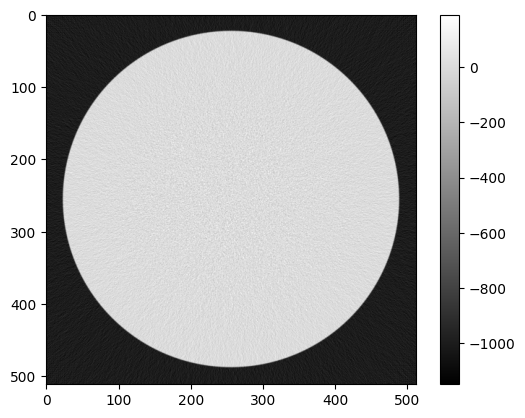

,Name,effective diameter [cm],age [year],pediatric subgroup,phantom,scanner,Dose [%],recon,kernel,FOV [cm],file,patientid,studyid,series,repeat
2740,29.2 cm MITA-LCD,29.2,21.0,adolescent,MITA-LCD,Siemens Somatom Definition,25.0,fbp,D45,32.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,14.0,56,simulation,0


In [69]:
import matplotlib.pyplot as plt
import pydicom
row = metadata[(metadata['Dose [%]']==25) &
               (metadata['phantom'] == 'MITA-LCD') &
               (metadata['recon'] == 'fbp') &
               (metadata['kernel'] == 'D45') &
               (metadata['FOV [cm]'] == 32.0) &
               (metadata['repeat'] == 0)]
dcm_file = row.file.item()
dcm = pydicom.dcmread(dcm_file)
img = dcm.pixel_array + int(dcm.RescaleIntercept)
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()
row

In [74]:
dcm.ImageType

['ORIGINAL', 'PRIMARY', 'AXIAL']

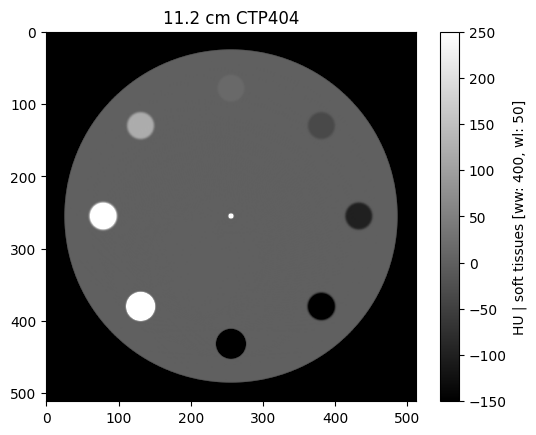

In [70]:
from utils import browse_studies
browse_studies(metadata, phantom='CTP404', fov=12.3, dose=100, recon='noise free', kernel='D45', repeat=0, display='soft tissues')

In [71]:
from utils import study_viewer

In [72]:
study_viewer(metadata)

interactive(children=(Dropdown(description='phantom', options=('CTP404', 'MITA-LCD', 'uniform'), value='CTP404…

## Viewing with Slicer

**Drag and drop the unzipped dataset** into [3D Slicer](https://www.slicer.org/) to automatically load the dataset into [Slicer's DICOM database](https://slicer.readthedocs.io/en/latest/user_guide/modules/dicom.html)

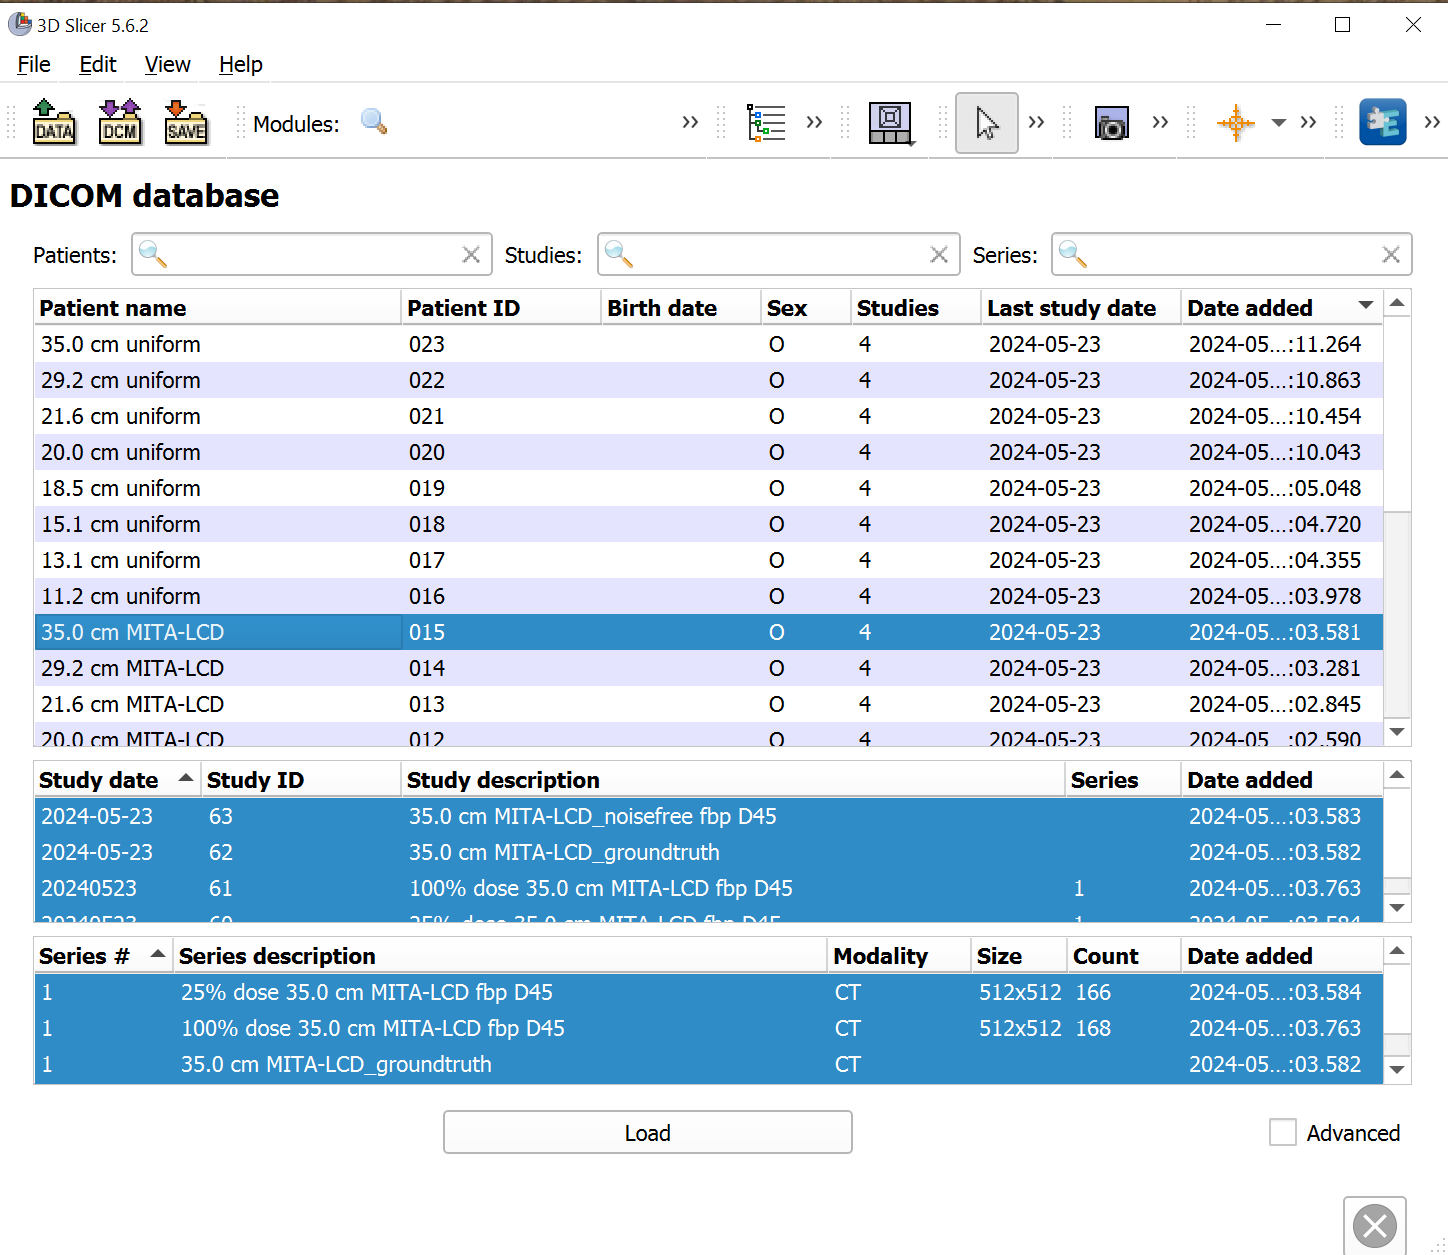

![](slicer_preview.png)

## Radiant (paid)
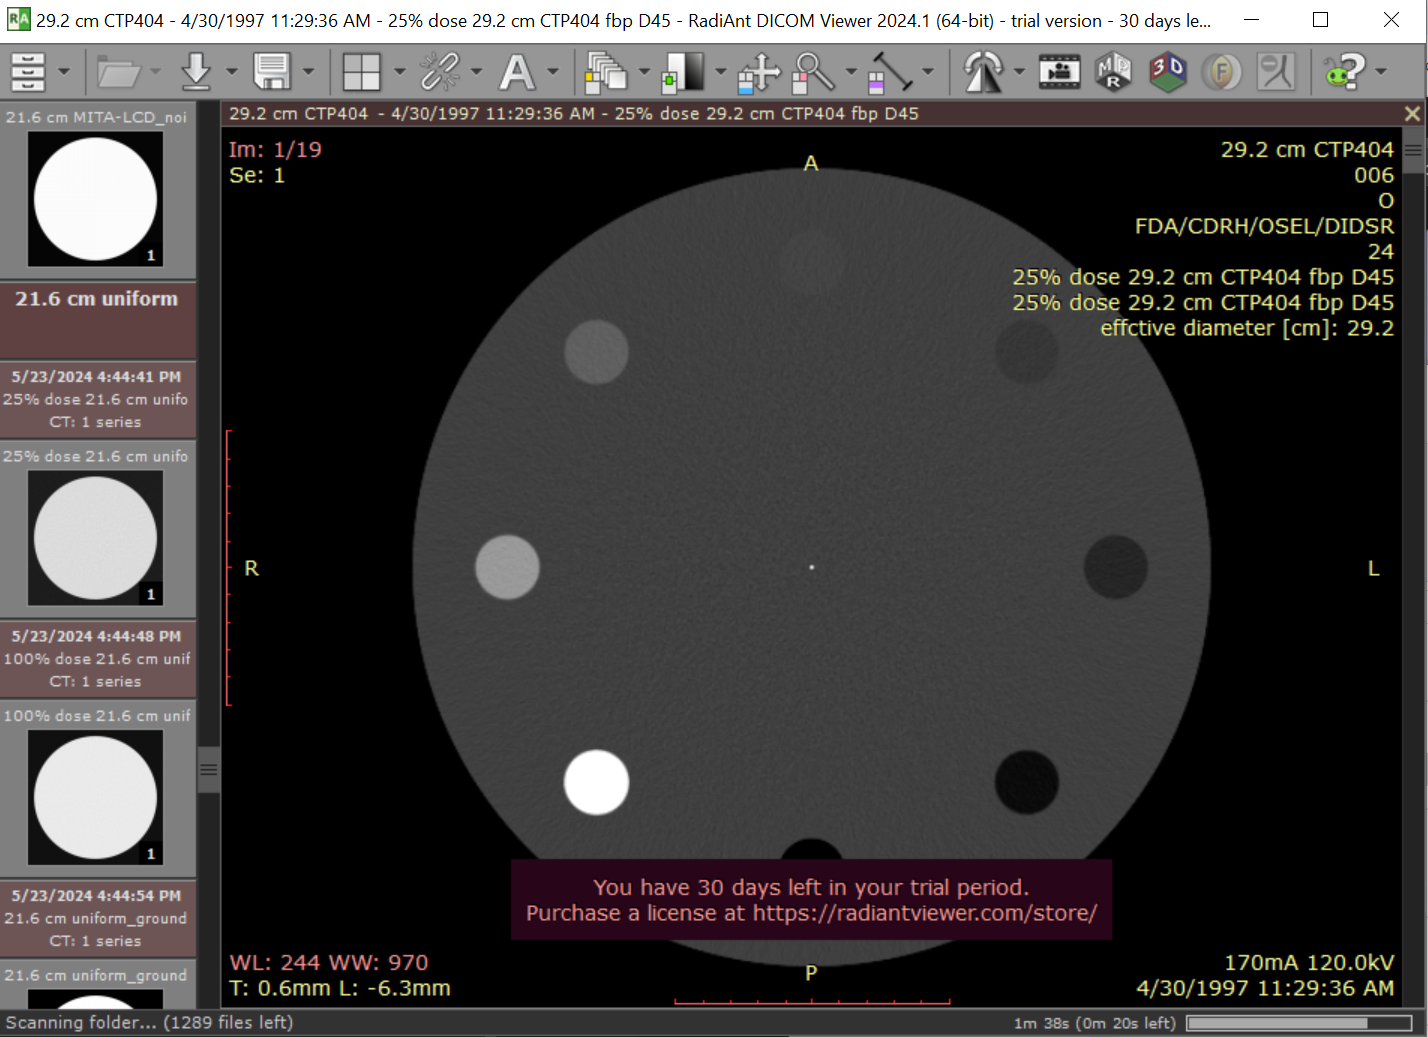

Other Viewers
1. Radiant (subscription)
2. SNAP ITK
3. ImageJ


## TODO

1. [X] once simulations are done, add also the noise free simulations to the dataset so both ground truth and noise free are available in the dataset
2. zip and upload updated dataset to [Zenodo](https://zenodo.org/records/10064036)